![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

- Import the required libraries and modules that you would need.

In [18]:
# Keeper libraries
import pandas as pd # dataframe managment
import numpy as npvisualizations # numerical python
import matplotlib.pyplot as plt # data visualization


# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

- Read that data into Python and call the dataframe `churnData`.

In [2]:
churnData = pd.read_csv('Customer-Churn.csv')

- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.

In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
churnData['TotalCharges'].eq(' ').sum()

11

In [5]:
# We couldn't convert it to numeric using pd.to_numeric because of the empty strings
churnData = churnData[~churnData['TotalCharges'].eq(' ')] # only including rows that aren't empty strings in TotalCharges

In [6]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges']) # using the function to convert it to numeric...

- Check for null values in the dataframe. Replace the null values.

In [7]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Nothing to do here

- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

In [10]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']] # Selecting the features from the lab
y = churnData['Churn'] # Is our customer churn or not?

  - Scale the features either by using normalizer or a standard scaler.

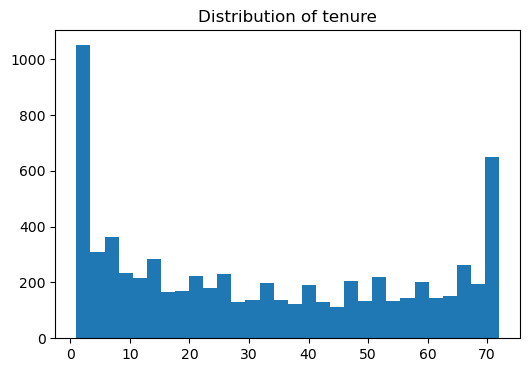

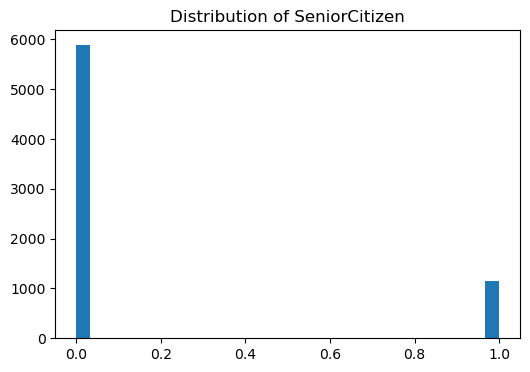

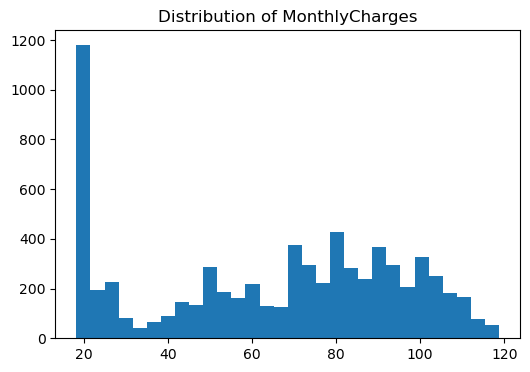

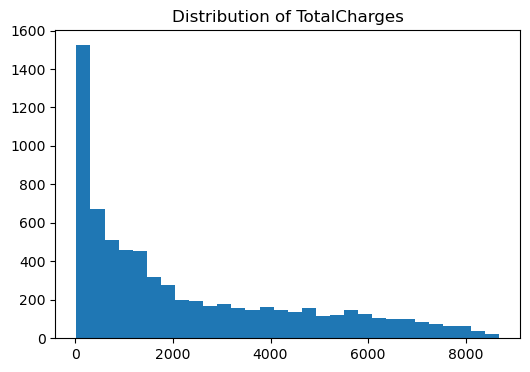

In [15]:
# Checking the distributions to select our scaler
for feature in X:
    plt.figure(figsize=(6, 4))
    plt.hist(churnData[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [20]:
# StandardScaler dosen't make any sense, since it's not normal distributed.
# We will use minmax, even to seniorcitizen (it will not affect the model)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

-  Split the data into a training set and a test set.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

  - Fit a logistic regression model on the training data.

In [24]:
model = LogisticRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

LogisticRegression()

  - Check the accuracy on the test data.

In [28]:
# 📚 Basic libraries
import pandas as pd # data manipulation
from ydata_profiling import ProfileReport # improved EDA
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management

# 🌐 SQL connection
from getpass import getpass # SQL connector
from sqlalchemy import create_engine # route to the engine

# 🤖 Machine Learning
from scipy.stats import skew # data distribution assymmetry
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay # roc curve, confussion matrix & displayer
from sklearn.metrics import classification_report # Metrics to check & compare our score

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [26]:
predictions = model.predict(X_test)

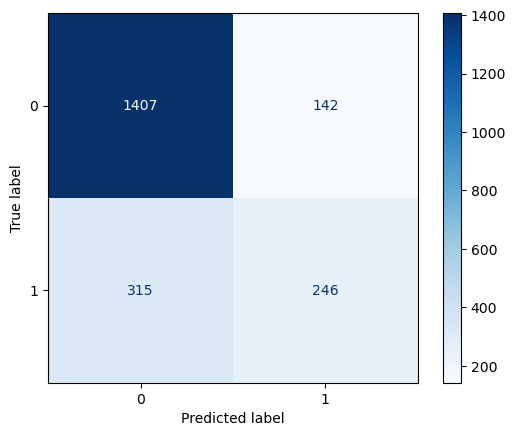


              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1549
         Yes       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.73      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [29]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

print("")
print(classification_report(y_test, predictions))

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.
